# Assignment 15. Random Forest 
## Dataset :- Fruad_check
### Quick info. about Random Forest.
#### Info. :- 
A random forest is a supervised machine learning algorithm that is constructed from decision tree algorithms. This algorithm is applied in various industries such as banking and e-commerce to predict behavior and outcomes.
A random forest is a machine learning technique that’s used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.
A random forest algorithm consists of many decision trees. The ‘forest’ generated by the random forest algorithm is trained through bagging or bootstrap aggregating. Bagging is an ensemble meta-algorithm that improves the accuracy of machine learning algorithms.
The (random forest) algorithm establishes the outcome based on the predictions of the decision trees. It predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome.
#### Features of a Random Forest Algorithm
It’s more accurate than the decision tree algorithm.
It provides an effective way of handling missing data.
It can produce a reasonable prediction without hyper-parameter tuning.
It solves the issue of overfitting in decision trees.
In every random forest tree, a subset of features is selected randomly at the node’s splitting point.
#### Applications of random forest
Banking
Health care
Stock market
E-commerce
#### Advantages of random forest
It can perform both regression and classification tasks.
A random forest produces good predictions that can be understood easily.
It can handle large datasets efficiently.
The random forest algorithm provides a higher level of accuracy in predicting outcomes over the decision tree algorithm.
#### Disadvantages of random forest
When using a random forest, more resources are required for computation.
It consumes more time compared to a decision tree algorithm.
https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

In [1]:
# important libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder


#### Data loading

In [2]:
Fraud_check01 = pd.read_csv("D:\Data Science Material\Assignments\Random Forest\Fraud_check.csv")

In [3]:
Fraud_check01.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


#### Exploring more 

In [4]:
# some mathematical caculation
Fraud_check01.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
# lets explore about the data types, null cols, dataset length, rows and columns
Fraud_check01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
Fraud_check01.shape

(600, 6)

#### Data Analysis

In [7]:
# finding NA values null values

Fraud_check01.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

No NA values present in dataset

In [8]:
# finding the value of each rows

Fraud_check01['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [9]:
# finding the value of each rows

Fraud_check01['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [10]:
# finding the value of each rows

Fraud_check01['Work.Experience'].value_counts()

10    31
13    28
30    25
28    25
12    25
14    24
11    23
21    23
5     22
27    22
26    22
7     21
29    21
19    21
16    19
6     19
25    19
2     19
17    18
15    18
24    17
23    16
20    15
0     14
1     14
8     14
3     14
4     14
22    13
9     13
18    11
Name: Work.Experience, dtype: int64

In [11]:
# finding the value of each rows

Fraud_check01['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [12]:
# making original data safe

Fraud_check = Fraud_check01.copy()

#### Data Cleaning

In [13]:
Fraud_check.head(1)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES


#### Outlier 

In [14]:
def count_plot(df, columns):
    plt.figure(figsize=(10, 5))
    for i, var  in enumerate(columns):
        plt.subplot(1,2,1)
        g = sns.countplot(df[var])
    plt.tight_layout()
    
features = Fraud_check.columns.tolist()
features.remove('Taxable.Income')
features

['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-p

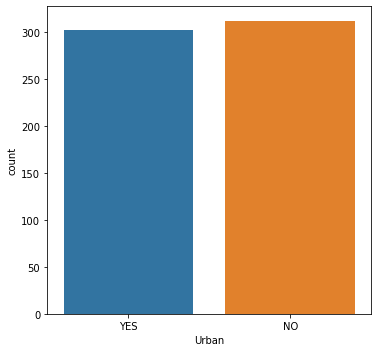

In [15]:
count_plot(Fraud_check, features)
plt.show()

In [16]:
# OrdinalEncoder - The input to this transformer should be an array-like of integers or strings, 
# denoting the values taken on by categorical (discrete) features. 
# The features are converted to ordinal integers. 
# This results in a single column of integers (0 to n_categories - 1) per feature.

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(Fraud_check[features])
Fraud_check_encoded = pd.DataFrame(data_encoded,columns = features)

data_encoded

array([[  0.,   2.,  84.,  10.,   1.],
       [  1.,   0., 398.,  18.,   1.],
       [  0.,   1., 481.,  30.,   1.],
       ...,
       [  0.,   0., 459.,   0.,   1.],
       [  1.,   1., 533.,  17.,   0.],
       [  0.,   0., 477.,  16.,   0.]])

In [17]:
Fraud_check_encoded.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,2.0,84.0,10.0,1.0
1,1.0,0.0,398.0,18.0,1.0
2,0.0,1.0,481.0,30.0,1.0
3,1.0,2.0,574.0,15.0,1.0
4,0.0,1.0,4.0,28.0,0.0


In [18]:
# making data in to categotical form 

Fraud_check.loc[Fraud_check["Taxable.Income"]>=30000,"Income"]="Good"
Fraud_check.loc[Fraud_check["Taxable.Income"]<=30000,"Income"]="Risky"

In [19]:
Fraud_check.head(1)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
0,NO,Single,68833,50047,10,YES,Good


In [20]:
#LebelEncoder - Encode target labels with value between 0 and n_classes-1. 
# This transformer should be used to encode target values, i.e. y, and not the input X.

encoder = LabelEncoder()
target_encoded = encoder.fit_transform(Fraud_check['Income'])
Fraud_check_encoded['Income'] = target_encoded
encoder.inverse_transform(target_encoded)

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [21]:
Fraud_check_encoded.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income
0,0.0,2.0,84.0,10.0,1.0,0
1,1.0,0.0,398.0,18.0,1.0,0
2,0.0,1.0,481.0,30.0,1.0,0
3,1.0,2.0,574.0,15.0,1.0,0
4,0.0,1.0,4.0,28.0,0.0,0


#### Feature Selection

In [22]:
# Required libraries for building model

from sklearn.model_selection import train_test_split


In [23]:
Fraud_check_encoded.head(1)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income
0,0.0,2.0,84.0,10.0,1.0,0


In [24]:
# capital X is denoted as metrics  # small y denoted as vectore

X = Fraud_check_encoded.iloc[:,:-1]
y = Fraud_check_encoded['Income']

In [25]:
X.head(1)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,2.0,84.0,10.0,1.0


In [26]:
y.head(1)

0    0
Name: Income, dtype: int32

In [27]:
# seperate out the dataset into train test split

# using this train and test we prevent the over fitting part of dataseet
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)
# showing shape of data actual dividation happened or not ?
print("shape of x_train",X_train.shape)
print("shape of x_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of x_train (420, 5)
shape of x_test (180, 5)
shape of y_train (420,)
shape of y_test (180,)


In [28]:
### Correlation on X_train

X_train.corr()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.033353,0.089697,0.031723,-0.057153
Marital.Status,0.033353,1.000000,0.027385,-0.005067,0.028701
City.Population,0.089697,0.027385,1.000000,0.002756,-0.064580
Work.Experience,0.031723,-0.005067,0.002756,1.000000,-0.075808
Urban,-0.057153,0.028701,-0.064580,-0.075808,1.000000


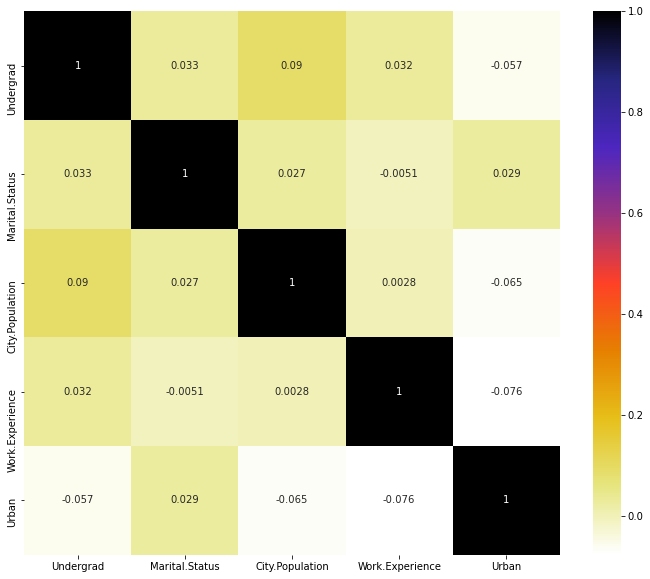

In [29]:
# using pearson corrilation,we doing corrilation on X_training dataset  only 
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [30]:
# with the following feature we can select highly correlated feature 
# it wll remove the first feature that is if it is highly correlated with anything other feature

def correlation(dataset,threshold):
    col_corr = set()  # set of all the names of correlated cols 
    corr_metrix = dataset.corr()
    for i in range(len(corr_metrix.columns)):
        for j in range(i):
            if (corr_metrix.iloc[i,j]) > threshold: # we r interesting in absolute coeff.values
                colnames = corr_metrix.columns[i]  # getting the names of cols
                col_corr.add(colnames)
    return col_corr

In [31]:
corr_features = correlation(X_train,0.7)
len(set(corr_features))

0

Here we found Zero correlation in our dataset X_train

### Model building

#### Random forest

In [32]:
#num_forest = 100
#max_features = 3
#kfold = KFold(n_splits = 10, random_state = 40, shuffle = True)
#model = RandomForestClassifier(n_estimators = num_forest, max_features = max_features)
#result = cross_val_score(model, X, y, cv=kfold)

#print(result.mean())

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# ensemble learning it takes learning from multiple model and combine it
num_forest = 100
max_features = 1
model = RandomForestClassifier(n_estimators = 100, max_features = 1)
kfold = KFold(n_splits = 20, random_state = 40, shuffle = True)
model.fit(X_train, y_train)
result = cross_val_score(model, X, y, cv=kfold)
print(result.mean())

0.7316666666666667


In [41]:
model.score(X_test, y_test)

0.7166666666666667

### Accuracy of test model :- 73.1 %

In [43]:
model.score(X_train, y_train)

1.0

### Accuracy of train model :- 100 %

In [44]:
y_predict = model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
result = confusion_matrix(y_test, y_predict)

In [46]:
# it plot 2 dimentional array
result

array([[126,  14],
       [ 40,   0]], dtype=int64)